# CLASSIFICADOR AUTMÁTICO DE IMAGENS

### Neste curso iremos trabalhar com um e-commerce, uma loja de roupas, e toda vez que subirmos uma imagem para a plataforma, teremos que escrever se ela é uma camiseta, bota, saia, ou seja, precisamos classificar esta imagem quando a colocamos no site. O que eles pediram foi que automatizássemos este processo, então, a partir do momento em que alguém coloca uma imagem nova no site, já tenhamos algo na máquina que entenda e classifique-a automaticamente.

In [1]:
#Instalando a biblioteca que possui as redes neurais
!pip install tensorflow


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importando o data set de dentro do Keras
import tensorflow
from tensorflow import keras
dataset = keras.datasets.fashion_mnist

In [3]:
# exibindo o dataset
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
# Carregando o dataset dentro das 2 tuplas
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [5]:
# verificando a extensão do dados, 60000 mil imagens para treino.
len(imagens_treino)

60000

In [6]:
# formato dos dados, temos um array de 28 linhas para 28 colunas
imagens_treino.shape

(60000, 28, 28)

In [7]:
# formato dos dados, temos um array de 28 linhas para 28 colunas e 10000 mil imagens para teste
imagens_teste.shape

(10000, 28, 28)

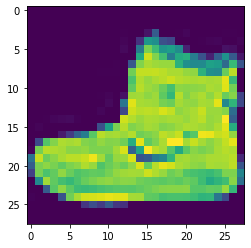

In [8]:
# visualizando as imagens através do matplotlib, temos uma imagens de 28x28 pixels
# cada pixel é categorizado por 0 ou 1, ou seja, linguagem de máquina
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])

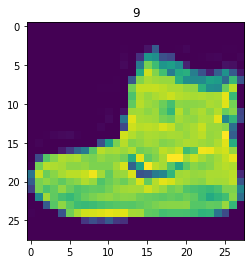

In [9]:
# na base de dados label, ou identificação, o algoritimo utiliza números e não palavras para classificar uma imagem
# temos um array com uma sequência de números para listar as imagens
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = 10

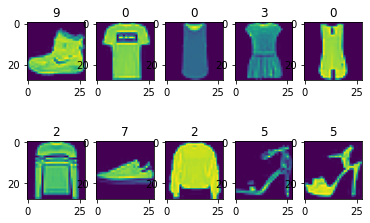

In [10]:
# realizando um  "FOR" para listar todas imagens categorizadas
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

In [11]:
# atribuindo nome para as classificações
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

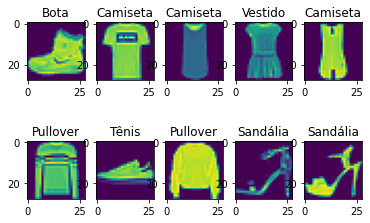

In [12]:
# plotando as imagens com nome
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [13]:
# o modelo possui três camadas em sequência, temos a entrada, o processamento e a saída
# instanciando a função
modelo = keras.Sequential([
    # sequenciando a entrada do modelo
    keras.layers.Flatten(input_shape=(28,28)),
    
    # criando uma camada com 256 funções que irão ser densas, completamente conectadas
    # tensorflow.nn.relu, função de redes neurais do tensorflow
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    
    # criando nossa base de saída.
    # o algoritimo vai comparar a imagem com as categorias e irá estipular a probalbilidade de acerto.
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# compilando o modelo, dando forma antes de treinar
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')

# treinando o modelo
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 19s 10ms/step - loss: 4.0062
